In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/IntroToAI/Week4

/content/drive/MyDrive/IntroToAI/Week4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Importing Dataset

The dataset is from the [Iris Plants Database](https://gist.github.com/curran/a08a1080b88344b0c8a7).

Relevant Information about this dataset is as follows:
This is perhaps the best known database to be found in the pattern recognition literature.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
* Predicted attribute: class of iris plant.
* This is an exceedingly simple domain.
* Number of Instances: 150 (50 in each of three classes)
* Number of Attributes: 4 numeric, predictive attributes and the class
* Attribute Information:
-- sepal length in cm
-- sepal width in cm
-- petal length in cm
-- petal width in cm
-- class: Iris Setosa, Iris Versicolour and Iris Virginica

The class is the target attribute or variable.

Loading the code and displays images of three different Iris flower species (Setosa, Versicolour, and Virginica) side by side using matplotlib library. Creating a figure with three subplots, each showing one of the species, and labels them accordingly. The axes are turned off for a cleaner visual presentation.

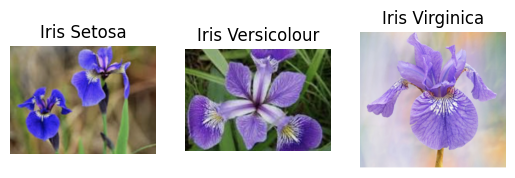

In [ ]:
img1 = plt.imread('Iris_Setosa.png')
img2 = plt.imread('Iris_Versicolour.png')
img3 = plt.imread('Iris_Virginica.png')
fig, axes = plt.subplots(1,3)
axes[0].imshow(img1)
axes[0].set_title("Iris Setosa")
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].set_title("Iris Versicolour")
axes[1].axis('off')
axes[2].imshow(img3)
axes[2].set_title("Iris Virginica")
axes[2].axis('off')
plt.show()

In [ ]:
#Import dataset
iris =pd.read_csv("iris.csv")
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Convert categorical target values into numeric values using the method fit_transform() in the encoder 'le' by passing the target column
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

 - Form the training dataset and test dataset. Also take a few future sample from the test dataset
 - Create the training and test datasets

In [ ]:
# Define the input features X as all columns except 'species' column and target variable y as the "species" column
X = iris.drop("species", axis=1)
y = iris["species"]

In [ ]:
# Using train_test_split function to split the dataset into the training and test datasets, the percentage of samples in the test dataset is 20% and the seed for the random number generator is 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Make a futureSample test dataset
# Take two samples from the dataset as the future data samples, called futureSample_X, and futureSample_y,
# as the inputs from the real-world cases when the classifier is deployed.

# Get the last two samples from the test  to be the future data samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove the last two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

Explore the training and test datasets

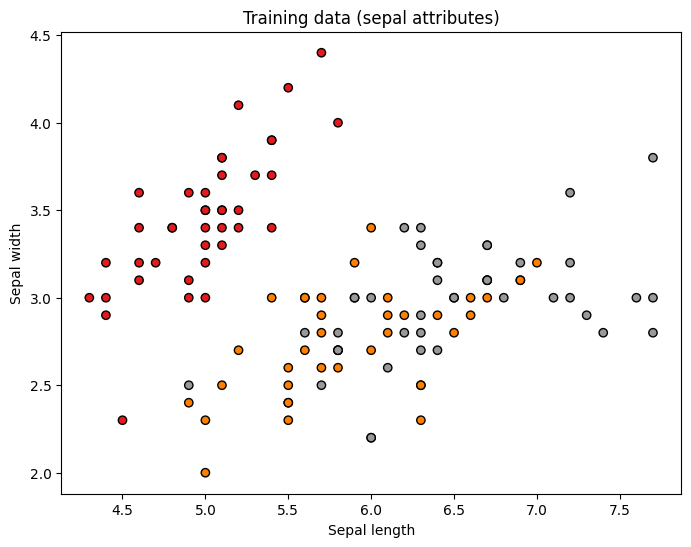

In [ ]:
# Plot the samples in the training dataset (use the first two attributes)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['sepal.length'], X_train['sepal.width'], c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Training data (sepal attributes)")
plt.show()

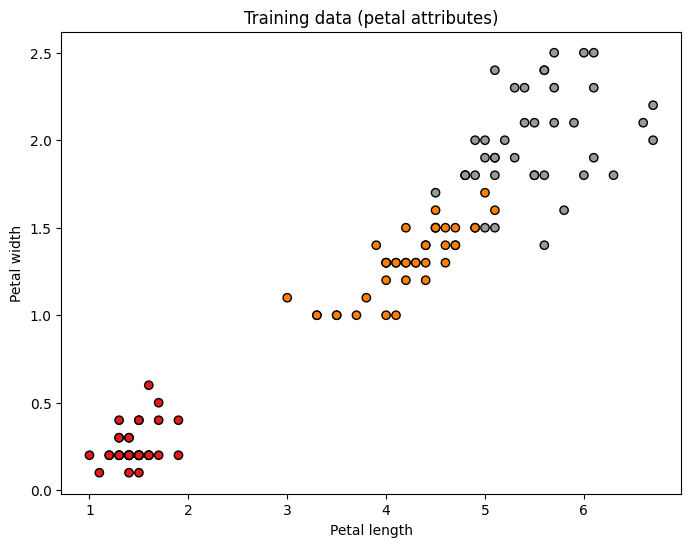

In [ ]:
# Using the example of plotting the samples in the training dataset (use the first two attributes), plot the samples in the training dataset (use the last two attributes)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['petal.length'], X_train['petal.width'], c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Training data (petal attributes)")
plt.show()

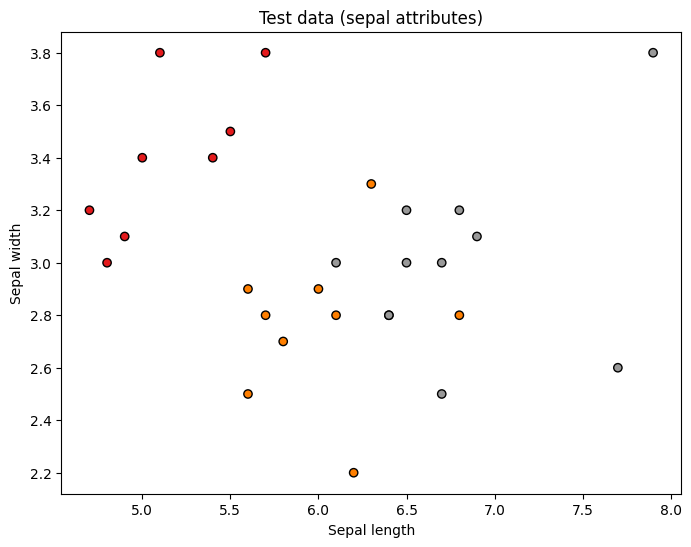

In [ ]:
# Plot the samples in the test dataset (use the first two attributes)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['sepal.length'], X_test['sepal.width'], c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Test data (sepal attributes)")
plt.show()

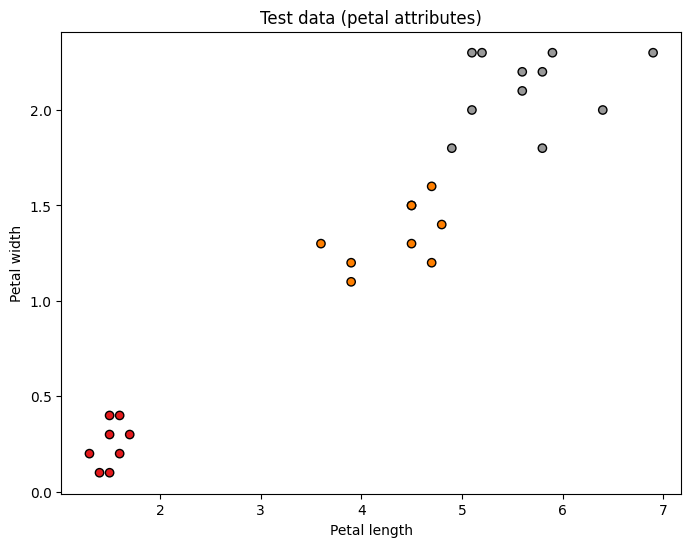

In [ ]:
# Using the example of plotting the samples in the test dataset (use the first two attributes), plot the samples in the test dataset (use the last two attributes)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['petal.length'], X_test['petal.width'], c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Test data (petal attributes)")
plt.show()

## Train a classification model by using a chosen learning algorithm with the trainig dataset.

model_option: 1- decision tree, 2- Random forest, 3-logistic regression, 4-K nearest neighbours, or 5 -- Support vector classifier




1. Problem statement: The Iris classification problem involves predicting the species of an Iris flower based on four features: sepal length, sepal width, petal length, and petal width. The goal is to classify the flowers into one of three species: Setosa, Versicolour, or Virginica. This is a multi-class classification problem because there are more than two possible output categories.
2. Implementation: For each class (Setosa, Versicolour, Virginica), the model learns separate weight (w) vectors and biases (b) during training based on the training dataset (displayed in the scatter plot). The model will calculate the value of the linear function into probabilities that sum to 1 using Softmax or Sigmoid, etc. acrosses the claseses. These w and b are adjusted to best fit the relationship between the input features and the target species, creating the most optimal classification forecasting model for new inputs. Then we will evaluate the model using some metrics such as accuracy or cross-validatin by using test set which is splitted from the data set.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
model_option = int(input("Choose one model from the following: 1- decision tree, 2- Random forest, 3- logistic regression, 4-K nearest neighbours, or 5- Support vector classifier \n your choice is: "))
if (model_option == 1):
    model = DecisionTreeClassifier(
        criterion = "entropy",
        splitter="best",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=None,
        random_state=42
    )
    # Train this model using the training dataset (train_data, train_label).
    model.fit(X_train, y_train)
elif (model_option == 2):
    model = RandomForestClassifier(
        n_estimators=100,
        criterion="entropy",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        bootstrap=True,
        oob_score=False,
        random_state=42
    )
    # Train this model using the training dataset (train_data, train_label).
    model.fit(X_train, y_train)
elif (model_option == 3):
    model = LogisticRegression(
        penalty="l2",         # L2 regularization helps prevent overfitting by penalizing large coefficient
        dual=False,           # As using L2 penalty, using default as False (number of features is larger than the number of samples) to solve primal optimization problem.
        random_state=None,    # Sets a random seed for reproducibility, so that the results are the same every time we run the code. As using solver is lbfgs, I set the number to default as None.
        solver="lbfgs",       # 'lbfgs' is an efficient solver for small-to-medium datasets and supports multi-class classification as well as minimizing the cost function.
        max_iter=100          # Sets the maximum number of iterations for the solver to converge to the optimal solution.
    )
    model.fit(X_train, y_train)
elif (model_option == 4):
    model = KNeighborsClassifier(
        n_neighbors=3,
        weights="uniform",
        algorithm="auto"
    )
    # Train this model using the training dataset (train_data, train_label).
    model.fit(X_train, y_train)
elif (model_option == 5):
    model = SVC(
        C=1.0,
        kernel="rbf",
        degree=3,
        gamma="scale",
        probability=False,
        max_iter=-1,
        decision_function_shape="ovr",
        random_state=None
    )
    # Train this model using the training dataset (train_data, train_label).
    model.fit(X_train, y_train)
else: print("invalid option number. Try again")

Choose one model from the following: 1- decision tree, 2- Random forest, 3- logistic regression, 4-K nearest neighbours, or 5- Support vector classifier 
 your choice is: 1


## Evaluate a classification model

Test the classification model's performance using the method `predict()` to calculate the predicted values of test data and store the values in a variable, `solution_test`, and use a number of measures to evaluate the performance of this model.

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred = model.predict(X_test)

In [ ]:
# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
score_test = accuracy_score(y_test, y_pred)
print (score_test)

1.0


In [ ]:
# Calculate the precision of prediction of lables of test samples using the method precision_score() in metrics
precision_test = precision_score(y_test, y_pred, average="macro")
print (precision_test)

1.0


In [ ]:
# calculate the recall of prediction of lables of test samples using the method recall_score() in metrics
recall_test = recall_score(y_test, y_pred, average="macro")
print (recall_test)

1.0


In [ ]:
# Calculate the F1-score of prediction of lables of test samples using the method f1_score() in metrics
f1_test =  f1_score(y_test, y_pred, average="macro")
print(f1_test)

1.0


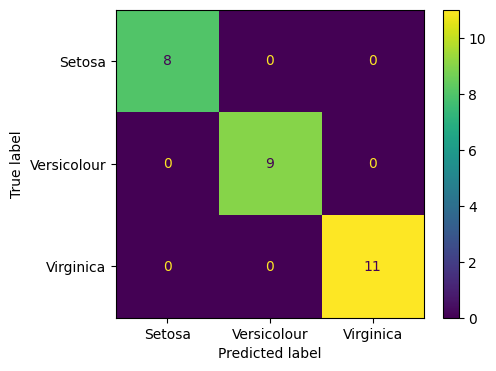

In [ ]:
# Display the confusion matrix using y_test and y_pred, the display lables are "Setosa,", "Versicolour", "Virginica".
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred, labels = [0,1,2])
cmp = ConfusionMatrixDisplay(cm, display_labels = ["Setosa", "Versicolour", "Virginica"])
cmp.plot(ax = ax);

In [ ]:
# Present the overal report of the model's evaluation results using the method classification_report() in metrics
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

